# Table of contents
1. project objective
2. Data preperation
3. Exploratory Data Analysis
4. Model Development and Evaluation
5. conclusion


## 1. Project objective
In recent years, there has been a noticeable rise in accidents involving vehicles, emphasizing the importance of subscribing to insurance plans that provide financial security during such events. This project focuses on predicting customer behavior regarding insurance subscription by analyzing historical data, including past accidents, vehicle lifespan, income levels, and family status.


## 2. Data preperation

In [81]:
import pandas as pd
import numpy as np
from numpy import NaN as NA
import numpy.random as random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# inline plot
%matplotlib inline

# seaborn style
sns.set_style('ticks')

In [82]:
# Load the training and score datasets
train_data = pd.read_csv("bzan6357_insurance_3_TRAINING.csv")
score_data = pd.read_csv("bzan6357_insurance_3_SCORE.csv")

In [83]:
# Understanding data - training data
print(train_data.head())


      id_new  buy  age  gender  tenure  region  dl  has_v_insurance     v_age  \
0  a00000000    0   34  female      31      19   1                0  1-2 year   
1  a00000001    0   50    male     211      34   1                0  1-2 year   
2  a00000002    0   42  female     122      29   1                0  1-2 year   
3  a00000003    0   28    male      75       3   1                0  1-2 year   
4  a00000004    0   75  female      19      28   1                0  1-2 year   

  v_accident  v_prem_quote  cs_rep  
0        yes       27715.0     154  
1        yes       33945.0     154  
2        yes       37577.0     163  
3        yes        2630.0     154  
4        yes       47511.0     122  


In [84]:
# understanding data - score data
print(score_data.head())

      id_new  age  gender  tenure  region  dl  has_v_insurance     v_age  \
0  a00020460   46    male     124       6   1                0  1-2 year   
1  a00020461   25  female     285      46   1                0  < 1 year   
2  a00020462   42    male      95      28   1                1  1-2 year   
3  a00020463   39  female     229      26   1                0  1-2 year   
4  a00020464   42    male     114      28   1                0  1-2 year   

  v_accident  v_prem_quote  cs_rep  
0        yes       26226.0     163  
1        yes       44564.0     154  
2         no       30796.0     122  
3        yes       35669.0     163  
4        yes       32039.0     122  


In [85]:
train_data=train_data.drop("id_new",axis=1)

train_data

,buy,age,gender,tenure,region,dl,has_v_insurance,v_age,v_accident,v_prem_quote,cs_rep
0,0,34,female,31,19,1,0,1-2 year,yes,27715.0,154
1,0,50,male,211,34,1,0,1-2 year,yes,33945.0,154
2,0,42,female,122,29,1,0,1-2 year,yes,37577.0,163
3,0,28,male,75,3,1,0,1-2 year,yes,2630.0,154
4,0,75,female,19,28,1,0,1-2 year,yes,47511.0,122
...,...,...,...,...,...,...,...,...,...,...,...
20455,0,23,female,178,8,1,1,< 1 year,no,28254.0,151
20456,0,61,male,298,28,1,0,1-2 year,yes,46134.0,122
20457,0,68,male,44,28,1,1,1-2 year,no,2630.0,122
20458,0,57,male,99,28,1,0,1-2 year,yes,36407.0,122


In [86]:
# test-train split 
# define features and target variable
X = train_data.drop("buy", axis=1)
y = train_data["buy"]

# splitting data into 80% train data and 20% test data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# slpit size
train_split_size = X_train.shape, y_train.shape
test_split_size = X_test.shape, y_test.shape

train_split_size, test_split_size

(((16368, 10), (16368,)), ((4092, 10), (4092,)))

In [87]:
#  By comparing the distribution of target variable we can evaluate the split

#original training set
dist_original = y.value_counts(normalize=True)

#train_data
dist_train_split = y_train.value_counts(normalize=True)

#test_data
dist_test_split = y_test.value_counts(normalize=True)

print('Distribution of Original Data: \n',dist_original);

print('\n Distribution of train_data: \n',dist_train_split);

print('\n Distribution of test_data: \n',dist_test_split);


Distribution of Original Data: 
 buy
0    0.816471
1    0.183529
Name: proportion, dtype: float64

 Distribution of train_data: 
 buy
0    0.818243
1    0.181757
Name: proportion, dtype: float64

 Distribution of test_data: 
 buy
0    0.809384
1    0.190616
Name: proportion, dtype: float64


There are few categorical variables in the dataset which are to be encoded hence we are using onehotencoder from scikit-learn to encode them.Additionally to find and remove any missingvalues we are using simpleimputer from  scikit-learn. It imputes all the missing values.

In [88]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [89]:
# creating a ColumnTransformer named preprocessor to apply different preprocessing steps to numerical and categorical columns separately.
# for this we need to create pipelines for both categorical and numerical features to impute and encode missing values and categorical variables
#step 1- identify numrical and categorical variables and create pipelines
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
#step 2-preprocessor
preprocessor = ColumnTransformer(
transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
])
#step 3- Apply preprocessor to train and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [90]:
X_train_preprocessed.shape, X_test_preprocessed.shape

((16368, 14), (4092, 14))

## 3. Exploratory Data Analysis (EDA)

In [91]:
# Categorical Features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   buy              20460 non-null  int64  
 1   age              20460 non-null  int64  
 2   gender           20460 non-null  object 
 3   tenure           20460 non-null  int64  
 4   region           20460 non-null  int64  
 5   dl               20460 non-null  int64  
 6   has_v_insurance  20460 non-null  int64  
 7   v_age            20460 non-null  object 
 8   v_accident       20460 non-null  object 
 9   v_prem_quote     20460 non-null  float64
 10  cs_rep           20460 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 1.7+ MB


In [92]:
train_data.describe()

,buy,age,tenure,region,dl,has_v_insurance,v_prem_quote,cs_rep
count,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000
mean,0.183529,42.512317,152.908016,26.624878,0.996970,0.276540,31689.197361,140.588759
std,0.387109,15.615623,83.483286,11.568606,0.054966,0.447298,18757.868023,16.749921
min,0.000000,20.000000,10.000000,0.000000,0.000000,0.000000,2630.000000,122.000000
25%,0.000000,29.000000,81.000000,24.000000,1.000000,0.000000,24731.750000,122.000000
50%,0.000000,40.000000,151.000000,28.000000,1.000000,0.000000,32533.500000,151.000000
75%,0.000000,53.000000,225.250000,29.000000,1.000000,1.000000,41294.250000,154.000000
max,1.000000,85.000000,299.000000,52.000000,1.000000,1.000000,472042.000000,163.000000


In [93]:
train_data.isnull().sum()

buy                0
age                0
gender             0
tenure             0
region             0
dl                 0
has_v_insurance    0
v_age              0
v_accident         0
v_prem_quote       0
cs_rep             0
dtype: int64

no missing values

<Axes: >

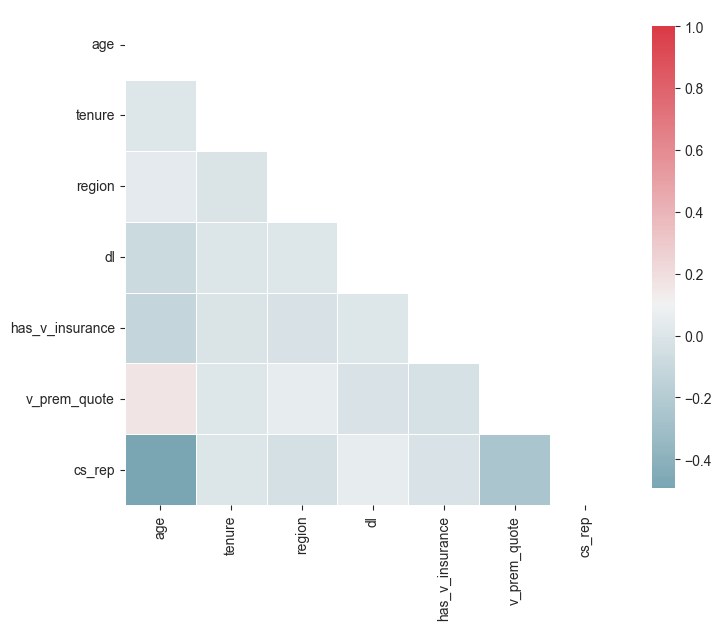

In [95]:
#correlation matrix
corr =X_train.corr(numeric_only=True)

# prepare tools for making a half-matrix correlation heatmap
mask = np.triu(np.ones_like(corr, bool))
f, ax = plt.subplots(1,1, figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.1, square=True, ax=ax, 
            linewidths=.5, cbar_kws={'shrink': .75})

It looks like all variables does not have either strong positive correlation nor strong negative correlation. they are in moderate phase where they might be correlated but does not effect other variables.

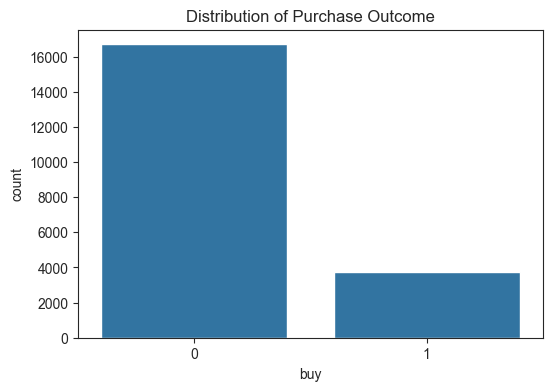

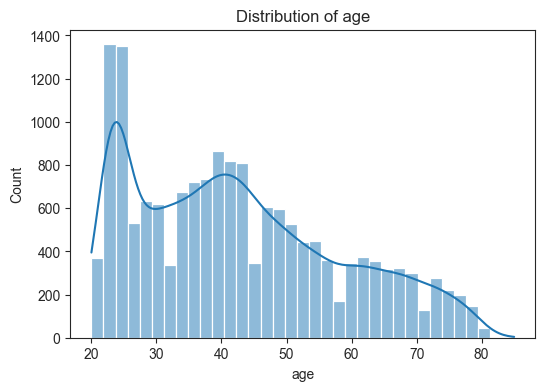

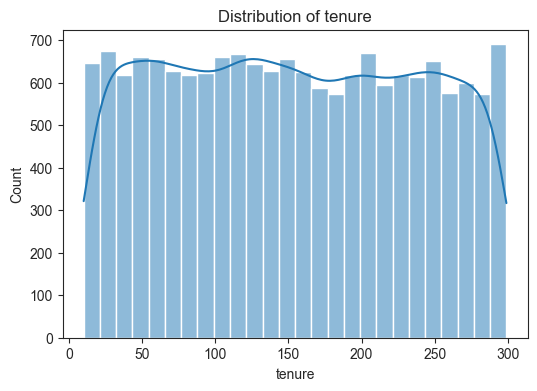

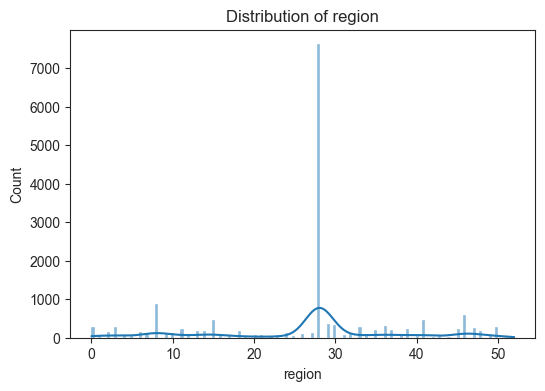

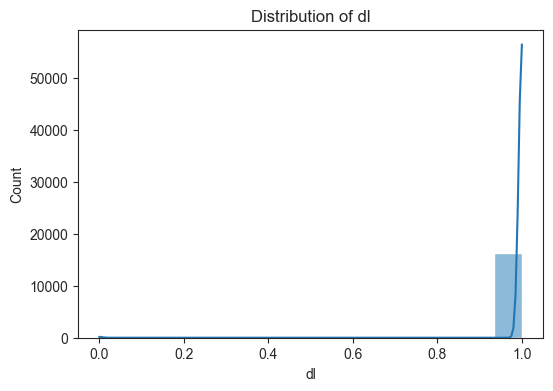

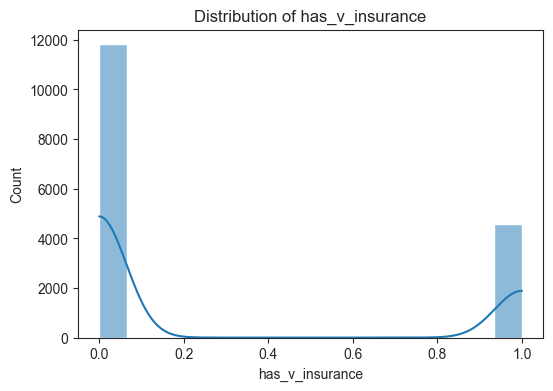

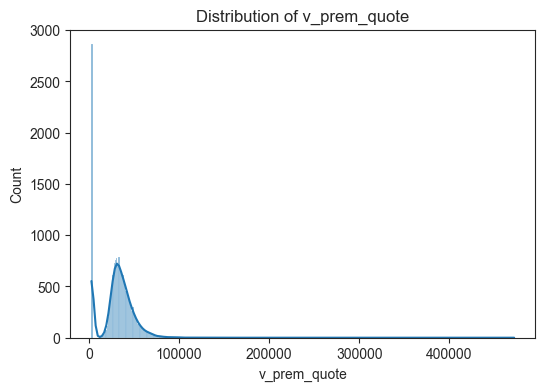

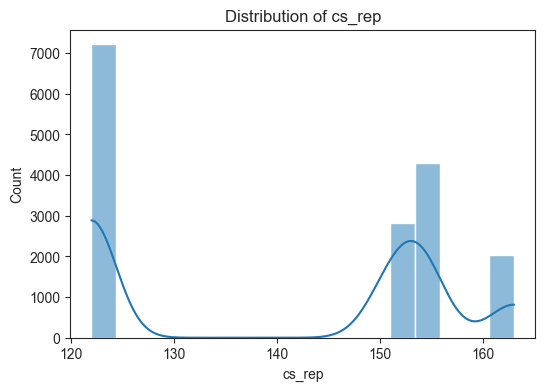

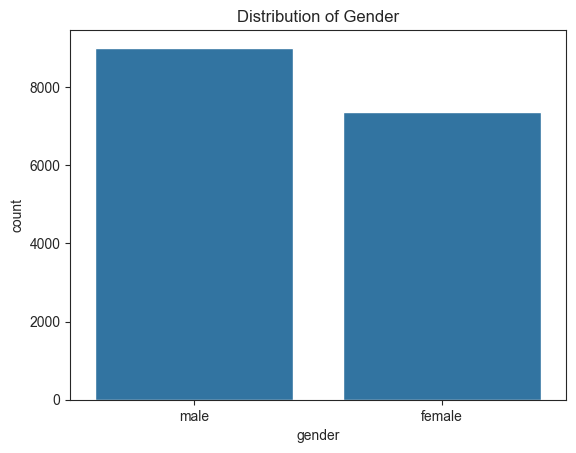

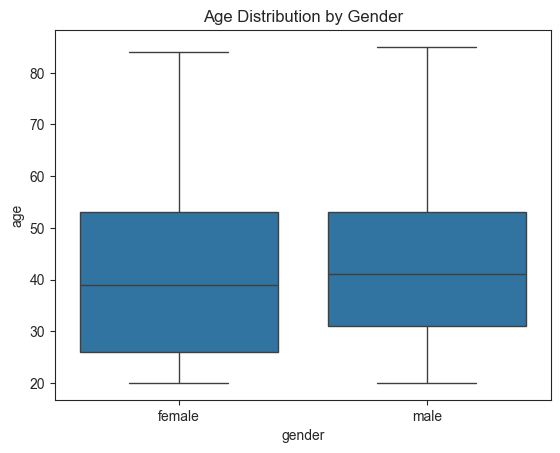

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='buy', data=train_data)
plt.title("Distribution of Purchase Outcome")
plt.show()

# Visualize the distribution of numerical features
for feature in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

# Visualize distribution of categorical features
sns.countplot(x='gender', data=X_train)
plt.title('Distribution of Gender')
plt.show()

# Explore relationship between features and target variable
sns.boxplot(x='gender', y='age', data=train_data)
plt.title('Age Distribution by Gender')
plt.show()


## 4. Model development and Evaluation

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Random Forest is a powerful ensemble learning technique that offers Hight accuracy ,Robustness to Overfitting, Handles Missing Values and Outlier. Additionally Random Forest provides a measure of feature importance, which indicates the contribution of each feature to the predictive performance of the model. This can be valuable for feature selection and understanding the underlying patterns in the data.Hence we chose Random forest for our classification.

In [98]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# crossvalidation of model
rf_cv_scores = cross_val_score(rf_model, X_train_preprocessed, y_train, cv=5, scoring='accuracy')

#accuracy
rf_cv_accuracy = rf_cv_scores.mean()

rf_cv_accuracy

0.7980818421243692

In [99]:
rf_model.fit(X_train_preprocessed, y_train)

# Predicting on the test split
y_pred_test_1 = rf_model.predict(X_test_preprocessed)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test_1)
# Setting zero_division=0 for precision
precision = precision_score(y_test, y_pred_test_1, zero_division=0)
recall = recall_score(y_test, y_pred_test_1)
f1 = f1_score(y_test, y_pred_test_1)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_preprocessed)[:, 1])

evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC-AUC Score": roc_auc
}

evaluation_metrics

{'Accuracy': 0.794477028347996,
 'Precision': 0.36444444444444446,
 'Recall': 0.10512820512820513,
 'F1 Score': 0.16318407960199005,
 'ROC-AUC Score': 0.7353568608324044}

1. positive outcome: customer purchase/buy insurance.   
2. negative outcome: customer did not purchase/not buy insurance.    
3. True Positive (TP): This represents cases where the model correctly predicts that the customer purchased insurance.    4. 
True Negative (TN): This represents cases where the model correctly predicts that the customer did not purchase insuranc.           .5. 
False Positive (FP): This represents cases where the model incorrectly predicts that the customer purchased insurance when they actually did not (Type I erro.                                                                  )6. .
False Negative (FN): This represents cases where the model incorrectly predicts that the customer did not purchase insurance when they actually did (Type II err.r).

In [78]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_1)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3169  143]
 [ 698   82]]


## 5. conclusion
Random Forest model has accuracy of 79% which means it classifies 79% of the data accurate.

In [79]:
# Train the Random Forest Classifier on the full training set
rf_model_full = RandomForestClassifier(random_state=42)
rf_model_full.fit(X_train_preprocessed, y_train)

# Predict probabilities for the Score dataset
X_score_preprocessed = preprocessor.transform(score_data)
if isinstance(X_score_preprocessed, np.ndarray):
    print("X_score_preprocessed is a numpy array")
else:
    print("X_score_preprocessed is not a numpy array")
X_score_preprocessed

X_score_preprocessed is a numpy array


array([[ 0.22142421, -0.34628129, -1.7849509 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.12227307,  1.58005253,  1.67581867, ...,  0.        ,
         0.        ,  1.        ],
       [-0.03451813, -0.69326068,  0.11847237, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.43715032,  1.00574183,  0.11847237, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.14099175,  0.10838135,  0.11847237, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.20497734,  1.24503795,  0.11847237, ...,  1.        ,
         0.        ,  1.        ]])

In [57]:
#run model
score_probabilities_rf = rf_model_full.predict_proba(X_score_preprocessed)[:, 1]

# Create the final submission dataset
final_data = pd.DataFrame({
    'id_new': score_data['id_new'],
    'probability': score_probabilities_rf,
    'classification': (score_probabilities_rf > 0.5).astype(int)
})

# Exporting the submission dataset to a CSV file
final_data.to_csv('my_prediction.csv', index=False)



In [55]:
display(final_data.head())

,id_new,probability,classification
0,a00020460,0.58,1
1,a00020461,0.27,0
2,a00020462,0.00,0
3,a00020463,0.25,0
4,a00020464,0.37,0
